# Bayesian network learning

# 1 - Learning

In order to introduce the task of probabilistic inference, we have assumed that the structure and parameters of the BN were already given. There are two possible ways to construct a BN: 
1. To manually define the model, usually with the help of an expert ([Beinlich et al., 1992](https://link.springer.com/chapter/10.1007/978-3-642-93437-7_28); [Van der Gaag et al., 2002](https://www.sciencedirect.com/science/article/pii/S093336570200012X?casa_token=O3Mlq1pOXDAAAAAA:FuzJahOS3tm-zGHTdVnE4veDdviuji6zuSKgOD66KoPtGCNln4PgNumXir_5C_UPdE8hsOxheA)).
2. To learn it from a dataset $\mathcal{D}$. 

Learning BNs is a very broad topic that depends on the specific goal that we set ([Daly et al., 2011](https://www.pure.ed.ac.uk/ws/portalfiles/portal/7949745/Learning_Bayesian_networks.pdf)). We may want to learn only the model parameters for a fixed structure, or some or all of the structure of a model. In some cases, we may be interested to produce not a single model but rather a probability distribution over models. 

In the following sections we address the problem of learning the BN parameters and structure when data is complete. In addition, we also address both of these tasks in the presence of incomplete data and discuss the complications that arise in that scenario.

## 1.1 - Parameter estimation

In this section, we present the problem of estimating the parameters of a BN when data is complete. That is, we assume that the network structure $\mathcal{G}$ is fixed and our data $\mathcal{D} = \{\mathbf{x}[1], \dots, \mathbf{x}[N]\}$ consists of $N$ fully observed instances of the network variables $\mathbf{X}$. As we will see in Section 1.2, this is not always the case.

There are two main approaches to fit the parameters of a BN: 
1. Maximum likelihood estimation
2. Bayesian estimation. 
 
We address each of these approaches in the following sections.

### 1.1.1 - Maximum likelihood estimation

Maximum likelihood estimation (MLE) is the most common method for parameter estimation in BNs. At its core is the idea that a good model is one that fits the data well. This goodness of fit is measured by the likelihood function, which is the probability that a model with a set of parameters $\mathbf{\theta}$ assigns to the data $\mathcal{D}$:

$$
\begin{align} 
L(\mathbf{\theta}: \mathcal{D}) = P(\mathcal{D} | \mathbf{\theta}) = \prod_{n=1}^{N} P(\mathbf{x}[n] | \mathbf{\theta}) \ , \ \ \ \ \ \ (1)
\end{align}
$$

where $P(\mathbf{x}[n] | \mathbf{\theta})$ represents the probability of the $n$th data instance given the model parameters. In practice, it is often convenient to work with the natural logarithm of the likelihood function, called the log-likelihood (LL):

$$
\begin{equation*}
\ell(\mathbf{\theta}: \mathcal{D}) = \sum_{n=1}^{N} \log P(\mathbf{x}[n] | \mathbf{\theta}) \ .
\end{equation*}
$$

In the MLE approach, we want to find the set of parameters $\hat{\mathbf{\theta}}$ that maximizes the LL of the data:
\begin{equation}
\hat{\mathbf{\theta}} = \underset{\mathbf{\theta}}{\max} \ \ell(\mathbf{\theta}: \mathcal{D}) \ . \ \ \ \ \ \ (2)
\end{equation}

This poses a high-dimensional optimization problem, even for BNs with a low number of variables, since we need to optimize over all the CPDs in the network. Fortunately, we can use the factorization property of Equation (\ref{eq:bn_jpd}) to write

$$
\begin{equation}
\ell(\mathbf{\theta}: \mathcal{D}) = \sum_{i} \ell_{i}(\mathbf{\theta}_{X_{i}|\mathbf{Pa}^{\mathcal{G}}_{i}}: \mathcal{D}) \ , \ \ \ \ \ \ (3)
\end{equation}
$$

where $\mathbf{\theta}_{X_{i}|\mathbf{Pa}^{\mathcal{G}}_{i}}$ are the parameters that encode the CPD of $X_{i}$ given its parents $\mathbf{Pa}^{\mathcal{G}}_{i}$ and

$$
\begin{equation*} 
\ell_{i}(\mathbf{\theta}_{X_{i}|\mathbf{Pa}^{\mathcal{G}}_{i}}: \mathcal{D}) = \sum_{n=1}^{N} \log P(x_{i}[n] | \mathbf{pa}^{\mathcal{G}}_{i}[n], \mathbf{\theta}_{X_{i} | \mathbf{Pa}^{\mathcal{G}}_{i}}) 
\end{equation*}
$$

is the local LL function of $X_{i}$. Identically to the LL function, we can easily induce the local function of the likelihood function, i.e., $L_{i}(\mathbf{\theta}_{X_{i}|\mathbf{Pa}^{\mathcal{G}}_{i}}: \mathcal{D})$. 

The exact form of these functions depends on the form of the CPD, see [Koller and Friedman (2009)](https://mitpress.mit.edu/9780262013192/probabilistic-graphical-models/) for a detailed explanation. The optimization problem of Equation (2) is decomposed into a summation of independent terms, one for each CPD in the network. We can then combine these individual solutions to get the MLE.

### 1.1.2 - Bayesian estimation

By using a point estimate of the parameters, such as the MLE, there is no measure of uncertainty, and no prior knowledge can be incorporated into the learning process.

In Bayesian statistics, prior knowledge is introduced via a prior distribution over the parameters, and uncertainty is reflected in its posterior distribution. The posterior distribution encodes updated beliefs once prior knowledge and data have been taken into consideration. For a fixed structure $\mathcal{G}$, the posterior distribution of the parameters $\mathbf{\theta}$ given the observed data $\mathcal{D}$ is defined as

$$
\begin{equation*}
P(\mathbf{\theta} | \mathcal{D}) = \frac{P(\mathcal{D|\mathbf{\theta}})P(\mathbf{\theta})}{P(\mathcal{D})} \ .
\end{equation*}
$$

The term $P(\mathbf{\theta})$ denotes the prior distribution of the parameters, $P(\mathcal{D}|\mathbf{\theta})$ is the probability of the data given the set of parameters, which is simply the likelihood function. Finally, $P(\mathcal{D})$ acts as a normalizing constant for the posterior distribution. 

In the case of MLE, we have seen in Equation (3) that the likelihood function decomposes according to the network structure. This decomposition allows us to individually estimate the parameters $\mathbf{\theta}_{X_{i} | \mathbf{Pa}^{\mathcal{G}}_{i}}$ of each CPD. For Bayesian estimation, we introduce the assumption of global parameter independence, which leads to a similar decomposition of the prior distribution ([Spiegelhalter and Lauritzen, 1990](https://www.stats.ox.ac.uk/~steffen/papers/spie.lau.pdf)):

$$
\begin{equation*}
P(\mathbf{\theta}) = \prod_{i} P(\mathbf{\theta}_{X_{i} | \mathbf{Pa}^{\mathcal{G}}_{i}}) \ .
\end{equation*}
$$

The decomposability properties of the likelihood function and the prior distribution produce that the posterior distribution can also be decomposed as a product of local terms:

$$
\begin{align*}
P(\mathbf{\theta} | \mathcal{D}) 
&= \frac{1}{P(\mathcal{D})} \prod_{i} \left[L_{i}(\mathbf{\theta}_{X_{i} | \mathbf{Pa}^{\mathcal{G}}_{i}} : \mathcal{D}) P(\mathbf{\theta}_{X_{i} | \mathbf{Pa}^{\mathcal{G}}_{i}}) \right] \\
&= \prod_{i} P(\mathbf{\theta}_{X_{i} | \mathbf{Pa}^{\mathcal{G}}_{i}} | \mathcal{D}) \ .
\end{align*}
$$


Finally, we need to address the issue of choosing a convenient prior. The form of the prior depends on the form of the CPD. 

When estimating the parameters of a categorical CPD, the common choice is to use Dirichlet priors. The Dirichlet distribution has the appealing property of being a conjugate prior to the categorical distribution. That is, the posterior distribution has the same functional form as the prior distribution. 

For linear Gaussian CPDs, the conjugate Gaussian-inverse-Gamma prior plays a similar role (or in the case that we use the multivariate Gaussian representation ([Gieger and Heckerman, 1994](https://arxiv.org/pdf/1302.6808)) the Gaussian-inverse-Wishart). We can combine the above to learn the CPDs of conditional linear Gaussian BNs. 

For more information on this topic, see [Bishop (2016)](https://www.microsoft.com/en-us/research/uploads/prod/2006/01/Bishop-Pattern-Recognition-and-Machine-Learning-2006.pdf).

## 1.2 - Structure learning

In this section, we consider the problem of learning the structure of a BN **when data is complete**. We can distinguish three main approaches: 

1. Scored-based structure learning.
2. Constraint-based structure learning.
3. Hybrid structure learning. 

We address each of these approaches in the following sections.

### 1.2.1 - Score-based sructure learning

Score-based methods approach the learning process from a model selection perspective. These methods define a hypothesis space of potential models, a set of operators to navigate this space, and a scoring function that measures how well the model fits the data. Then, the learning task is to find the highest-scoring BN structure. While this problem has proven to be NP-hard ([Chickering, 1996](https://www.microsoft.com/en-us/research/publication/1995/01/Learning-Bayesian-Networks-Search-Methods-and-Experimental-Results.pdf); [Chickering et al., 2004](https://www.jmlr.org/papers/volume5/chickering04a/chickering04a.pdf)), various techniques have been developed to render the structure search tractable. Depending on the nature of their search space, they are usually divided into two main groups:

* **Space of orders**. These algorithms assume an initial topological order for the variables, and use this prior ordering to reduce the complexity of the search space. Given a BN with $m$ nodes (where there is a maximum number of $k$ parents per node) and an ordering of the BN nodes, the highest-scoring BN structure can be learned in $O(m^{k})$ time [(Cooper, 1992](https://link.springer.com/content/pdf/10.1007/BF00994110.pdf)). The main disadvantage of order-based search is that, without restrictions, the complexity of finding the true ordering is $O(m!)$. Despite this discouraging result, several algorithms have successfully approached this problem using both greedy search ([Teyssier and Koller, 2005](https://arxiv.org/pdf/1207.1429); [Scanagatta et al., 2017](http://proceedings.mlr.press/v73/scanagatta17a/scanagatta17a.pdf)} and metaheuristics ([Larrañaga et al., 1996](https://proceedings.mlr.press/r0/larranaga95a/larranaga95a.pdf); [Hsu et al., 2002](https://www.researchgate.net/profile/Haipeng-Guo-6/publication/220741799_A_Permutation_Genetic_Algorithm_For_Variable_Ordering_In_Learning_Bayesian_Networks_From_Data/links/53fc0bef0cf22f21c2f3a1e3/A-Permutation-Genetic-Algorithm-For-Variable-Ordering-In-Learning-Bayesian-Networks-From-Data.pdf); [Faulker, 2007](https://ieeexplore.ieee.org/iel5/4221263/4221264/04221271.pdf?casa_token=DB43BIzQbG4AAAAA:syRmQO5blv9_zMHf6JYQ2yI0VROUXJbOtoKndv69vUeRLZngegycqU9O6VGZcm_JdumUh6UgAQ))
	
* **Space of structures**. These algorithms start with some initial structure $\mathcal{G}_{0}$, usually an empty graph, which automatically becomes the currently best structure $\mathcal{G}$. Then, they get all the neighbor structures of $\mathcal{G}$ by applying local structure modification operators such as arc introduction (AI), arc elimination (AE), and arc reversal (AR). Certain arc restrictions $\mathcal{R}_{A}$ may limit the structures produced by these operators. Finally, $\mathcal{G}$ is replaced with the highest-scoring structure. This process is repeated until there are no changes in the structure that can improve the score. One of the initial works of this approach is the  hill-climbing (HC) method proposed by [Heckerman et al. (1995)](https://link.springer.com/content/pdf/10.1007/BF00994016.pdf), which is depicted in Algorithm (2.1). Several researchers have presented variants of this work that seek to make the search process faster and more accurate. These include techniques based on reducing the search space ([Hwang et al., 2022](https://www.researchgate.net/profile/Byoung-Tak-Zhang/publication/221419564_Construction_of_Large-Scale_Bayesian_Networks_by_Local_to_Global_Search/links/09e4150e6eaf07654a000000/Construction-of-Large-Scale-Bayesian-Networks-by-Local-to-Global-Search.pdf)), branch and bound ([Suzuki, 1999](https://citeseerx.ist.psu.edu/document?repid=rep1&type=pdf&doi=3df3bfd1fe607ddf6b3ddd2b4772b5ca11c0e884); [Suzuki, 2018](https://pgm2018.utia.cas.cz/data/workshopproceedings.pdf#page=55)), and metaheuristics, usually with a different representation such as a connectivity matrix ([Wong et al., 1999](https://ieeexplore.ieee.org/iel4/34/16160/00748825.pdf?casa_token=ocf5y9pTThEAAAAA:hH3u0yusZqpTYMw5Hy6gYxjF_UfFcDFRcCSw0p1ROVmEWTvEMaDg1uC9-IMRhZF3fxSGtcnWBw); [Blanco et al., 2003](https://onlinelibrary.wiley.com/doi/pdf/10.1002/int.10084?casa_token=N0p7MmEx2FIAAAAA:KNG9lIoe6T-sjS4jMnmswjuWdeTuKo7IzBhMe8gwZ74BD3Uf_KVSDSu6rljrJOc1DRmfGlJiSwcTMQ); [Kim et al., 2013](https://www.sciencedirect.com/science/article/pii/S1665642313715669)).

<table>
<tr>
  <td>
    <img src="./images_3/hill_climbing_algorithm.png" alt="Hill-climbing algorithm" width="800">
  </td>
</tr>
</table>

Evaluating a structure from the search space requires computing its score. As expected, one of the most important decisions in this type of learning is the choice of the scoring function. There are two main groups of scores: 

1. Those based on the likelihood function.
2. Those based on the marginal likelihood.
 
We address each of these groups of scores in the following sections. For more information, see [Carvalho (2009)](http://www.lx.it.pt/~asmc/pub/talks/09-TA/ta_pres.pdf).

#### Likelihood scores

A natural choice for the scoring function is the LL, which tries to find a model that would make the data as probable as possible. However, the LL tends to favour complete BN structures and it does not provide a useful representation of the independence assumptions of the learned BN. This lack of generalization (over-fitting) is usually avoided by using a penalized version of the LL score:

$$
\begin{equation} 
\text{score}_{L}(\mathcal{G}: \mathcal{D}) = \ell(\hat{\mathbf{\theta}}_{\mathcal{G}} : \mathcal{D}) - \text{pen}(\mathcal{G}, \mathcal{D}) \ , \ \ \ \ \ \ (4)
\end{equation}
$$

where $\ell(\hat{\mathbf{\theta}}_{\mathcal{G}} : \mathcal{D})$ is the log-likelihood function, $\hat{\mathbf{\theta}}_{\mathcal{G}}$ are the MLE parameters of the considered structure $\mathcal{G}$, and $\text{pen}(\mathcal{G}, \mathcal{D})$ is a penalty function that can depend on $\mathcal{G}$ and $\mathcal{D}$. In the Akaike information criterion (AIC) ([Akaike, 1974](https://ieeexplore.ieee.org/iel5/9/24140/01100705.pdf?casa_token=9NQbXwG7VPcAAAAA:GO9nx_qbpokOqp1nMU6Dlsaj5YhBNIra04Vz9mS1ahbyoYLCAbP80IHR8HycvSSraU60247J3g)), $\text{pen}(\mathcal{G}, \mathcal{D}) = \text{dim}(\mathcal{G})$, where $\text{dim}(\mathcal{G})$ is the model dimension, or the number of independent parameters in $\mathcal{G}$. The Bayesian infromation criterion (BIC) ([Schwarz, 1978](https://www.jstor.org/stable/pdf/2958889.pdf?casa_token=gJdHkB8ICvEAAAAA:2w3QpdPqLkkuqC192BKIfYMdZ1ZGcPSJdrFJJZtbE90_7bqDzSPLk_f8AqbLFbgaWFAa7CMYNTYzF5msN6joNAbRbfxZGoCz6CAec92dfgXANA-MdOs)), extends this penalization by including the length of $\mathcal{D}$:

$$
\begin{equation*}
BIC(\mathcal{G}: \mathcal{D}) = \ell(\hat{\mathbf{\theta}}_{\mathcal{G}} : \mathcal{D}) - \frac{\text{dim}(\mathcal{G})}{2} \log(N) \ ,
\end{equation*}
$$

where $N$ is the number of instances in $\mathcal{D}$. Note that the BIC coincides with the minimum description length (MDL) ([Lam and Bacchus, 1994](https://www.academia.edu/download/31192533/10.1.1.127.5504.pdf)) when scoring BN structures. 

The decomposability property of the LL allows an efficient computation of these scores. With a decomposable score, a local change in the structure (such as adding an arc) does not change the score of other parts of the structure that were unaffected.


#### Bayesian scores

In the Bayesian learning problem, we assume that the learner has a prior distribution $P(\mathcal{G})$ over the set of possible structures. In addition, we assume that, once a structure is considered, the learner has a prior distribution $P(\mathbf{\theta}_{\mathcal{G}} | \mathcal{G})$ over its set of parameters $\mathbf{\theta}_{\mathcal{G}}$. By Bayes rule, we have that

$$
\begin{equation*}
P(\mathcal{G} | \mathcal{D}) = \frac{P(\mathcal{D | \mathcal{G}}) P(\mathcal{G})}{P(\mathcal{D})} \ ,
\end{equation*}
$$

where $P(\mathcal{D})$ acts as a normalizing factor that does not help distinguish between different structures. Thus, we define the Bayesian score as:

$$
\begin{equation*}
\text{score}_{B}(\mathcal{G} : \mathcal{D}) = \log P(\mathcal{D} | \mathcal{G}) + \log P(\mathcal{G}) \ .
\end{equation*}
$$

Although the structure prior $P(\mathcal{G})$ gives us a way of preferring some structures over others, it does not play an important role in the asymptotic analysis of the Bayesian score because it is not related to the data. For this reason, we often assume a uniform prior over the structures and ignore this term of the score. The term $P(\mathcal{D} | \mathcal{G})$ is the marginal likelihood of the data given the structure, since it marginalizes out the unknown parameters:

$$
\begin{equation*}
P(\mathcal{D} | \mathcal{G}) = \int P(\mathcal{D} | \mathbf{\theta}_{\mathcal{G}}, \mathcal{G}) P(\mathbf{\theta}_{\mathcal{G}} | \mathcal{G}) d\mathbf{\theta}_{\mathcal{G}} \ ,
\end{equation*}
$$

where $P(\mathcal{D} | \mathbf{\theta}_{\mathcal{G}}, \mathcal{G})$ is the likelihood of the data given a structure $\mathcal{G}$ with parameters $\mathbf{\theta}_{\mathcal{G}}$, and $P(\mathbf{\theta}_{\mathcal{G}} | \mathcal{G})$ is our prior distribution over the set of parameters for this structure. The integration over all possible sets of parameters protects us from over-fitting: models with more parameters do not necessarily have higher marginal likelihood. This is called the Bayesian Occam's razor effect ([MacKay, 1991](https://thesis.library.caltech.edu/25/1/MacKay_djc_1992.pdf)). 

The form of the prior distribution over the set of parameters determines the form and properties of the Bayesian score. If the prior $P(\mathbf{\theta}_{\mathcal{G}} | \mathcal{G})$ satisfies both the global parameter independence and the parameter modularity assumptions, then the Bayesian score is decomposable. Bayesian scores that are decomposable include the K2 ([Cooper and Herskovits, 1992](https://link.springer.com/content/pdf/10.1007/BF00994110.pdf)) and BDe ([Heckerman et al., 1995](https://link.springer.com/content/pdf/10.1007/BF00994016.pdf)) scores for categorical BNs, the BGe for linear Gaussian BNs ([Geiger and Heckerman, 1994](https://arxiv.org/pdf/1302.6808)), and the combination of BDe and BGe for conditional linear Gaussian BNs ([Heckerman and Geiger, 1995](https://arxiv.org/pdf/1302.4957)).


### 1.2.2 - Constraint-based structure learning

Constraint-based methods approach the learning process from a statistical independence point of view. These methods perform conditional independence tests and select the equivalence class of BNs that best explains them. An equivalence class of BNs is defined by all the BN structures that represent the same JPD.  Some of the key algorithms of the constraint-based approach are: inductive-causation ([Verma and Pearl, 1990](https://dl.acm.org/doi/pdf/10.1145/3501714.3501732?casa_token=TRqD8YS8Cy4AAAAA:hBFRHCVc0F8eCk7Vkz_saoJsINFT07waKZ1CKWhMWJ5CohTjJWfeB4aZ_HPRVYKq9_3l9b82Zj2Z)), PC ([Spirtes et al., 2000](https://philarchive.org/archive/SPICPA-2)), grow-shrink ([Margaritis, 2003](https://www.cs.cmu.edu/~dmarg/Papers/PhD-Thesis-Margaritis.pdf)), and incremental association Markov blanket ([Tsamardinos et al., 2003](https://cdn.aaai.org/FLAIRS/2003/Flairs03-073.pdf)).


All constraint-based methods share a common two-phase structure inherited from the inductive-causation algorithm. First, they learn the skeleton of the DAG by checking through conditional independence tests if there is a set of variables that separates a particular pair of variables. If that set is empty, then there must be an arc. Second, they try to assign directions to the arcs as in [Meek (1995)](https://arxiv.org/pdf/1302.4972). The common limitation of these methods is their sensitiveness to failures in the conditional independence tests. A single mistake in one of these tests suffices to mislead the learning process. Another drawback is the amount of data required by these algorithms. The size of the data hugely increases with respect to the number of conditional variables in the independence test. 

### 1.2.3 - Hybrid structure learning

Both score-based methods and constraint-based methods have their advantages. For example, score-based methods usually perform better with less data and constraint-based methods are usually faster. For this reason, researchers have tried to combine the advantages of both approaches in the generation of hybrid methods. Some representative hybrid methods include the works of [Sing and Valtorta (1993)](https://arxiv.org/pdf/1303.1485), [Sing and Valtorta (1995)](https://www.sciencedirect.com/science/article/pii/0888613X9400016V/pdf?md5=707f6aeacd6511e3c74fb9a80ca2818a&pid=1-s2.0-0888613X9400016V-main.pdf), [Dash and Druzdzel (1999)](https://arxiv.org/pdf/1301.6689), [de Campos et al. (2003)](https://onlinelibrary.wiley.com/doi/pdf/10.1002/int.10085?casa_token=AKkBbyP4gYoAAAAA:rpF-mLHBkIbEF7OMDyS51Xp1O9n5ofJtLR97rcPGMCQS_U8z-JOrmvBmPtHacExZUiqGk-rC0brHTw), and [Tsamardinos et al. (2006)](https://link.springer.com/content/pdf/10.1007/s10994-006-6889-7.pdf)

## 1.3 - Learning with incomplete data

**The assumption of complete data is often unrealistic**. In some cases, certain data values are missing by accident (e.g., they could have been omitted in the collection process). In other cases, their absence is intentional (e.g., in a medical setting, the presence or absence of a biopsy result is clearly not random and it is related to the result of a preliminary blood test). In addition, data may be also incomplete because some variables may be hidden or latent (e.g., in a clustering problem, cluster assignments are not observed; in factor analysis, factors also not observed). The distinction between these cases has been thoroughly studied in the literature, see [Little and Rubin (1987)](https://toc.library.ethz.ch/objects/pdf03/e01_978-0-470-52679-8_01.pdf) for more information on this topic.

In this section we consider the problem of learning when missing values and hidden variables are present. We first address the parameter estimation problem and then discuss the even more challenging structure learning problem. 

In order to do that, we need to expand the notation previously introduced in Section 1.1. For an incomplete dataset $\mathcal{D}$ with $N$ instances, we denote the missing (or latent) variables and their possible assignments in the $n$th instance by $\mathbf{H}[n]$ and $\mathbf{h}[n]$, respectively. In addition, we use $\mathcal{H} = \cup_{n} \ \mathbf{h}[n]$ to denote the set of all possible assignments to all unobserved values in the dataset. Thus, the pair $(\mathcal{D}, \mathcal{H})$ defines an assignment to all variables in all data instances.

### 1.3.1 - Parameter estimation


Most of the key properties that helped make parameter estimation feasible with complete data vanish in the incomplete data setting. The learning task requires to globally optimize over a high-dimensional space, with an objective that is highly susceptible to local optima. As a consequence, we need to adjust the MLE and Bayesian estimation approaches.

#### Maximum likelihood estimation

In the presence of incomplete data, the likelihood function of Equation (1) has to consider an exponential number of assignments to the missing values in the dataset: 

\begin{equation*}
L(\mathbf{\theta} :  \mathcal{D}) = P(\mathcal{D} | \mathbf{\theta}) =  \sum_{\mathcal{H}} P(\mathcal{D}, \mathcal{H} | \mathbf{\theta}) \ .
\end{equation*}

As a result, although each of the terms $P(\mathcal{D}, \mathcal{H}| \mathbf{\theta})$ is a unimodal distribution, the sum can have, in the worst case, an exponential number of modes. However, unimodality is not the only property that we lose. In the presence of incomplete data, the likelihood function can be written as


\begin{equation} 
L(\mathbf{\theta} :  \mathcal{D}) = \prod_{n=1}^{N} P(\mathbf{x}[n] | \mathbf{\theta}) = \prod_{n=1}^{N} \sum_{\mathbf{h}[n]} P (\mathbf{o}[n], \mathbf{h}[n] | \mathbf{\theta}) \ , \ \ \ \ \ \ (5)
\end{equation}


where $\mathbf{o}[n]$ refers to the observed values in the $n$th data instance. Equation (5) shows that, to compute the likelihood function, we need to perform inference for each instance. As we discussed in Section \ref{sec:2_inference}, this problem can be intractable. Thus, even the task of evaluating the likelihood function becomes a difficult computational problem.

Therefore, in the presence of incomplete data, we lose all of the important properties of the likelihood function: its unimodality, its closed-form representation, and its decomposition as a product of local likelihoods. Without these properties, the parameter estimation task becomes a substantially more complex optimization problem.

The most straightforward approach to this optimization is to apply a gradient ascent procedure. [Binder et al. (1997)](https://link.springer.com/content/pdf/10.1023/A:1007421730016.pdf) derive the gradient form for BNs and show that it can be efficiently computed by applying probabilistic inference. Unfortunately, gradient ascent procedures are guaranteed to achieve only a local maximum of the likelihood function. In order to increase our chances of finding a global maximum, or at least a better local maximum, we have to consider multiple starting points or apply random perturbations.

An alternative algorithm for optimizing the likelihood function is the EM algorithm ([Depmster et al., 1977](https://www.jstor.org/stable/pdf/2984875.pdf?casa_token=S8yW2a89suYAAAAA:izU6P7_gr7l_7mDQmTxfKhOB7w1Qg4s63QoAxg7hKLFYj4NHt0-2vo3A2GXtoYPoxeMojtBAigQt3uV3bAfxbGSAs07NAyicom_cm7IFo-bqV3SzGAw); [McLachlan and Krishnan, 2008](https://www.amazon.es/EM-Algorithm-Wiley-Probability-Statistics-dp-0471201707/dp/0471201707/ref=dp_ob_title_bk)). Each iteration $t$ of this algorithm is divided into two steps: 

1. The expectation step, in which the estimated parameters $\hat{\mathbf{\theta}}_{t}$ are used to infer a posterior distribution $P(\mathcal{H} | \mathcal{D}, \hat{\mathbf{\theta}}_{t})$ of the missing values $\mathcal{H}$ given the observations $\mathcal{D}$. 
2. The maximization step, in which a new point estimate of the parameters $\hat{\mathbf{\theta}}_{t+1}$ is computed. 

It can be shown that the EM algorithm is guaranteed to monotonically improve the likelihood of the observed data until convergence to a (typically) local maximum. In order to diminish the problem of local maxima and improve the performance of the EM algorithm, we can run EM from multiple starting points or apply the pyramid scheme proposed by [Chickering and Heckerman (1997)](https://link.springer.com/content/pdf/10.1023/A:1007469629108.pdf).


#### Bayesian estimation

Since the posterior distribution is a product of the prior distribution and the likelihood function, it follows that the useful properties shown by the posterior distribution when data is complete are lost in the incomplete data setting. The posterior $P(\mathcal{H}, \mathbf{\theta} | \mathcal{D})$ becomes a highly complex and multimodal distribution that can no longer be represented as a product of local posterior distributions. In order to estimate this complex distribution, we need to resort to approximate inference methods. In theory, we can apply any approximate inference procedure to this problem. Thus, all approximate inference methods we introduced in `2_inference.ipynb` can potentially be used for performing Bayesian estimation with incomplete data. However, due to its speed and simplicity, we have chosen the mean-field variational inference method. When applied to the Bayesian learning problem, it is usually referred to as the VB approach ([Attias, 2000](https://proceedings.neurips.cc/paper_files/paper/1999/file/74563ba21a90da13dacf2a73e3ddefa7-Paper.pdf)).

The goal of variational inference is to find an approximate distribution $Q(\mathcal{H}, \mathbf{\theta})$ from some tractable family $\mathcal{Q}$ that closely approximates the true posterior distribution $P(\mathcal{H}, \mathbf{\theta} | \mathcal{D})$. For simplicity, we denote these distributions $Q$ and $P$, respectively. The key principle of variational inference is to solve this problem via optimization, in which a set of variational parameters $\mathbf{\varphi}$ that makes $Q$ closest to $P$ is identified. The usual cost function for this optimization problem is the reverse Kullback-Leibler (KL) divergence:

$$
\begin{align}
\text{KL}(Q | | P) 
 &= \int \int Q(\mathcal{H}, \mathbf{\theta}) \log \frac{Q(\mathcal{H}, \mathbf{\theta})}{P(\mathcal{H}, \mathbf{\theta} | \mathcal{D})} d\mathcal{H} d\mathbf{\theta} \\
 &= \mathbb{E}_{Q} \left[\log \frac{Q(\mathcal{H}, \mathbf{\theta})}{P(\mathcal{H}, \mathbf{\theta} | \mathcal{D})} \right] \\
 &= \mathbb{E}_{Q} \left[\log Q(\mathcal{H}, \mathbf{\theta}) \right] - \mathbb{E}_{Q} \left[\log P(\mathcal{H}, \mathbf{\theta}, \mathcal{D}) \right] + \log p(\mathcal{D}) \ . \ \ \ \ \ \ (6)
\end{align}
$$

However, we cannot minimize this function because it requires computing the intractable $\log p(\mathcal{D})$. Instead, we can maximize an alternative function that is equivalent to the reverse KL divergence up to this constant (the marginal likelihood). This function is called the lower bound of the marginal likelihood or the evidence lower bound (ELBO):

$$
\begin{equation}
\text{ELBO}(Q : \mathcal{D}) = \mathbb{E}_{Q} \left[\log P(\mathcal{H}, \mathbf{\theta}, \mathcal{D}) \right] - \mathbb{E}_{Q} \left[\log Q(\mathcal{H}, \mathbf{\theta}) \right] \ . \ \ \ \ \ \ (7)
\end{equation}
$$

We can infer two things from Equations (6) and (7). First, we can see that maximizing the ELBO is equivalent to minimizing $\text{KL}(Q | | P)$. Second, we can see that, as its name suggests, the ELBO is a lower bound of the marginal likelihood (usually called the evidence in the Bayesian literature), which follows from the derivation through Jensen's inequality and the fact that $\text{KL}(\cdot) \geq $ 0 ([Jordan et al., 1999](https://statistics.berkeley.edu/sites/default/files/tech-reports/508.pdf)). The complexity of maximizing the ELBO is determined by the complexity of the variational family $\mathcal{Q}$. In this dissertation, we use the VB framework, which assumes a factorization of the variational posterior that is based on the mean-field approximation:

$$
\begin{equation*}
Q(\mathcal{H}, \mathbf{\theta}) = \prod_{n=1}^{N} Q(\mathbf{h}[n]) Q(\mathbf{\theta})\ .
\end{equation*}
$$

The VB framework iteratively maximizes the ELBO with respect to $Q(\mathcal{H})$ and $Q(\mathbf{\theta})$. This results in an iterative algorithm that is directly analogous to the EM (called the VB-EM algorithm), which is guaranteed to monotonically increase the ELBO. Its expectation and maximization steps have the following form:

* **Expectation**. Update the variational posterior distribution of the unobserved values:

$$
\begin{equation*}
	Q_{t+1}(\mathcal{H}) \propto  \exp \left[ \int Q_{t}(\mathbf{\theta}) \log P(\mathcal{D}, \mathcal{H} | \mathbf{\theta}) d\mathbf{\theta} \right] \ ,
\end{equation*}
$$

* **Maximization**. Update the variational posterior distribution of the parameters:

$$
\begin{equation*}
	Q_{t+1}(\mathbf{\theta}) \propto  \exp \left[ \int Q_{t+1}(\mathcal{H}) \log P(\mathcal{D}, \mathcal{H} | \mathbf{\theta})  d\mathcal{H} \right]  P(\mathbf{\theta}) \ .
\end{equation*}
$$

The exact forms of the variational expectation and maximization equations depend on the functional forms of the CPDs in the model (e.g. for categorical BNs, see [Beal and Ghahramani (2006)](https://projecteuclid.org/journals/bayesian-analysis/volume-1/issue-4/Variational-Bayesian-learning-of-directed-graphical-models-with-hidden/10.1214/06-BA126.pdf)). However, deriving a set of specific update equations for each type of conditional distribution is an arduous task. Fortunately, the variational message passing (VMP) framework ([Winn and Bishop, 2005](https://www.jmlr.org/papers/volume6/winn05a/winn05a.pdf?q=variational)) provides a set of general purpose update equations  that work for any BN for which all parent distributions are conjugate. A model in which both of these constraints hold is known as a conjugate-exponential (CE) model. 

 [Rodriguez-Sanchez et al. (2021)](https://oa.upm.es/72625/3/LARRANAGA_2022_12_B.pdf) combines the VMP framework with the VB-EM algorithm to estimate the parameters of a conditional linear Gaussian BN when data is incomplete. Fortunately, a conditional linear Gaussian BN is a CE model. 
 
Finally, even though we focus here on the VB framework, we can add more flexibility to the parameter estimation process by using more flexible variational families ([Bishop et al, 1998](https://proceedings.neurips.cc/paper/1997/file/c0826819636026dd1f3674774f06c51d-Paper.pdf); [Barber and WWiegerinck, 1998](https://proceedings.neurips.cc/paper_files/paper/1998/file/297fa7777981f402dbba17e9f29e292d-Paper.pdf)) and nonconjugate priors ([Wang and Blei, 2013](https://www.jmlr.org/papers/volume14/wang13b/wang13b.pdf)), but at the cost of a more difficult optimization problem.

### 1.3.2 - Structure learning

We can distinguish two possible scenarios when learning a BN from incomplete data: 
1. Data is partially observed, i.e., no variable in the data has all its values missing, 
2. There are latent variables in the data, i.e., one or many variables in the data have all its values missing. 

We address each of these scenarios in the following sections.

#### Structure learning with partially observed data

We need data to be complete in order to apply any of the approaches that we discussed in Section \ref{sec:2_structure_learning}. Constraint-based methods require data completeness to compute conditional independence tests, and score-based methods require data completeness for its scores to be decomposable. A simple approach is to exclude those instances with missing values. However, estimates obtained from this approach may be biased if the excluded instances are systematically different from those included. Inverse probability weighting (IPW) ([Horvitz and Thompson, 1952](https://www.jstor.org/stable/pdf/2280784.pdf?casa_token=x-YFPbcd3rcAAAAA:T1Gc0d5vpBEpCzpUtdhNXopFm7loVSxUmJXhhNoj1LnPxoqIu0dCOCD5udOSx6iVP_XK1IH3uuccSDBNdkghD5deFM0ZiGopch-bsQn0sArZ1k9xD6Y); [Robins et al., 1994](https://www.jstor.org/stable/pdf/2290910.pdf?casa_token=TADk8681O7cAAAAA:PIoQynE1EjZZ_c1hQVNYSz7tCybhWez0wBPSlJeMYXV3QpQ3TUSURMlrx-ACMUVN4SfOAYA1Dyu_HmiJK2s6J5taQfxsxzFteH2qsx4WSY56T2nengM)) is one of several methods that can reduce this bias. In IPW, complete instances are weighted by the inverse of their probability of being a complete instance. This idea has been applied to the domain of constraint-based structure learning. [Gain and Shipster (2018)](http://proceedings.mlr.press/v72/gain18a/gain18a.pdf) propose a variant of the PC algorithm that utilizes IPW for each conditional independence test.

<table>
<tr>
  <td>
    <img src="./images_3/sem_algorithm.png" alt="Structural EM algorithm" width="800">
  </td>
</tr>
</table>

[Friedman (1997)](http://www.cs.huji.ac.il/~nirf/Papers/Fr1.pdf) proposes a completely different approach by generalizing the EM algorithm to the problem of score-based structure learning. This method, called SEM, is described in Algorithm (2.2). Similar to EM, it also iterates over a pair of steps. At each iteration $t$, in the expectation step, it uses the current model to generate a complete dataset $D^{*}_{t}$. Then, in the maximization step, it estimates not only the parameters of the new model, but also its structure. Any of the score-based procedures we described in Section 1.2.1 can be used for this purpose. However, the scoring function to be maximized must be a penalized version of the LL, as in Equation (4).

It is important to note the benefits of SEM compared to a brute-force approach: rather than re-estimating the model parameters after each structure change, the output of a single expectation step is used to perform many structure changes. At each iteration $t$, SEM selects the model $\mathcal{B}_{t+1}$ with the highest expected score. The expected score is usually referred to as $\text{score}(\mathcal{D}^{*}_{t}, \mathcal{B}_{t+1})$, and its use is motivated by the following inequality:

$$
\begin{equation}
\text{score}(\mathcal{B}_{t+1} : \mathcal{D}^{*}_{t}) - \text{score}(\mathcal{B}_{t} : \mathcal{D}^{*}_{t}) \leq \text{score}(\mathcal{B}_{t+1} : \mathcal{D}) - \text{score}(\mathcal{B}_{t} : \mathcal{D}) \ . \ \ \ \ \ \ (8)
\end{equation}
$$

Equation (8) states that an improvement in the observed score (i.e., using the observed data $\mathcal{D}$) of network $\mathcal{B}_{t+1}$, relative to the network $\mathcal{B}_{t}$ that was used to generate $ \mathcal{D}^{*}_{t}$, is at least as large as the improvement of the expected score using the completed data $\mathcal{D}^{*}_{t}$. This guarantees that SEM converges  without the need of using probabilistic inference in each structure change. However, despite the computational savings provided by SEM, it is still a highly demanding algorithm due to the need of applying probabilistic inference in its expectation step. For this reason, works like [Scanagatta et al. (2018)](https://www.sciencedirect.com/science/article/pii/S0888613X17307272) and [Benjumeda et al. (2019)](https://www.sciencedirect.com/science/article/pii/S0031320319300974?casa_token=-I_5NMYRdZgAAAAA:42c9NWQhl_ftRn8jrUR2iKano8VMhPfqIH4-EA5Ki0IdGVH4OSyPMdihIhOTFWe0paAd_Lmgjg) have proposed adaptations of the SEM algorithm that bound the inference complexity in the expectation step.

Finally, the idea of SEM can also be applied to Bayesian learning. However, in order to compute the expectation step we have to rely either on a maximum a posteriori (MAP) solution or on an approximate Bayesian inference solution. The Bayesian SEM algorithm proposed by [Friedman (1998)](https://arxiv.org/pdf/1301.7373) advocates for the first solution. [Rodriguez-Sanchez et al. (2021)](https://oa.upm.es/72625/3/LARRANAGA_2022_12_B.pdf) advocate for the second solution, where they combine SEM with the VB framework.

#### Structure learning with latent variables

Latent variables, as opposed to observed variables, are variables that are not directly measured but rather inferred from the observed variables through the statistical model. When a latent variable is known to exist, we can introduce it into the BN model and apply methods such as the SEM algorithm to perform structure learning with incomplete data. However, we cannot simply place a latent variable arbitrarily in the model and expect our learning procedure to produce a reasonable model. In fact, if a latent variable is placed where it does not improve the model score, there is a good chance it will end up being disconnected from the rest of variables ([Koller and Friedman, 2009](https://mitpress.mit.edu/9780262013192/probabilistic-graphical-models/)). Thus, we need a mechanism to introduce latent variables in approximately the right location in the BN structure. 

There are many approaches that can be used to introduce a latent variable. One approach is based on finding structural signatures that the latent variable might leave, such as densely connected variables ([Elidan et al, 2000](https://proceedings.neurips.cc/paper/2000/file/95e6834d0a3d99e9ea8811855ae9229d-Paper.pdf)). Unfortunately, this technique does not perform too well, since structure learning algorithms are usually biased against fitting models with densely connected variables, especially with limited data. As a result, [Elidan and Friedman (2005)](https://www.jmlr.org/papers/volume6/elidan05a/elidan05a.pdf) propose instead to consider information signatures, which are identified using the information bottleneck method ([Tishby et al., 1999](https://arxiv.org/pdf/physics/0004057); [Friedman et al., 2001](https://arxiv.org/pdf/1301.2270)). A completely different approach is to use a search method to iteratively explore a space of models. This idea was first proposed by [Zhang (2004)](https://www.jmlr.org/papers/volume5/zhang04a/zhang04a.pdf), which considered the space of latent tree models. Since then, it has been greatly improved with several methods and different strategies. For more information, see [Rodriguez-Sanchez et al. (2020)](https://ieeexplore.ieee.org/iel7/6287639/6514899/09207730.pdf) and [Rodriguez-Sanchez et al. (2021)](https://oa.upm.es/72625/3/LARRANAGA_2022_12_B.pdf) .


# 2 - PGMPy

## 2.1 - Parameter estimation in Categorical BNs using complete data

In this example, we are going to train the parameters of the Alarm network. While we don't have real data, we are going to use this predefined model to sample some data and learn its parameters again (just to show how the parameter learning process works). So, all in all, we are going to:

1. Load the Alarm model (both the structure and parameters)
2. Sample some data from it (i.e., from its underlying joint probability distribution)
3. Reuse the structure of the Alarm model and learn its parameters from scratch using the aforementioned data.

### 2.1.1 - Define the model

In [1]:
from pgmpy.utils import get_example_model

asia_model = get_example_model("asia")

### 2.1.2 - Paint the graph

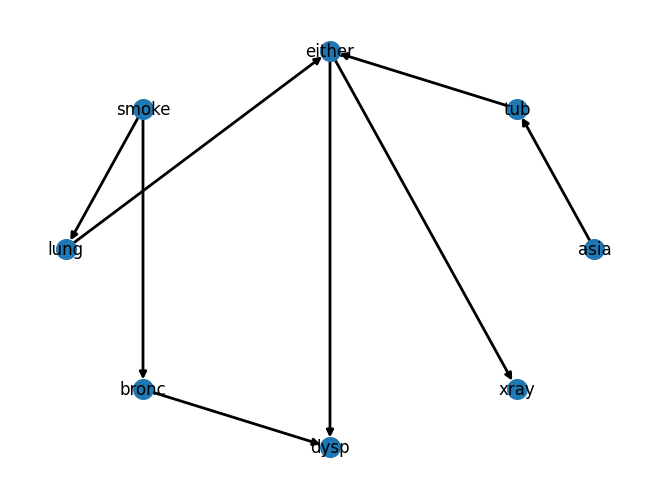

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

# Create NetworkX graph
G = nx.DiGraph()
G.add_edges_from(list(asia_model.edges()))

# Choose layout
pos = nx.circular_layout(G)

# Node size
node_size = 200

# Draw the graph with adjustments
nx.draw(G, pos=pos, with_labels=True, arrows=True, width=2, node_size=node_size)
plt.show()

### 2.1.3 - Generate some data

In [3]:
from pgmpy.sampling import BayesianModelSampling

samples = BayesianModelSampling(asia_model).forward_sample(size=int(1e3))
samples.head()

  0%|          | 0/8 [00:00<?, ?it/s]

/Users/fernando/Documents/GitHub/notes-ai/Probabilistic Graphical Models/Bayesian networks/.venv/lib/python3.10/site-packages/pgmpy/sampling/base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


,asia,tub,smoke,lung,bronc,either,xray,dysp
0,no,no,no,no,no,no,no,no
1,no,no,yes,no,yes,no,no,yes
2,no,no,no,no,no,no,no,no
3,no,no,no,no,no,no,no,yes
4,no,no,yes,no,yes,no,no,yes


### 2.1.4 - Define model structure (reuse Alarm DAG)

In [4]:
from pgmpy.models import BayesianNetwork

model_struct = BayesianNetwork(ebunch=asia_model.edges())
model_struct.nodes()

NodeView(('asia', 'tub', 'either', 'smoke', 'lung', 'bronc', 'dysp', 'xray'))

### 2.1.5 - Parameter estimation using MLE

In [5]:
# Fitting the model using Maximum Likelihood Estimator

from pgmpy.estimators import MaximumLikelihoodEstimator

mle = MaximumLikelihoodEstimator(model=model_struct, data=samples)

# Estimating the CPD for a single node.
print(mle.estimate_cpd(node="asia"))
print(mle.estimate_cpd(node="smoke"))

# Estimating CPDs for all the nodes in the model
mle.get_parameters()[:10]  # Show just the first 10 CPDs in the output

+-----------+-------+
| asia(no)  | 0.992 |
+-----------+-------+
| asia(yes) | 0.008 |
+-----------+-------+
+------------+-------+
| smoke(no)  | 0.504 |
+------------+-------+
| smoke(yes) | 0.496 |
+------------+-------+


[<TabularCPD representing P(asia:2) at 0x17fb3fa90>,
 <TabularCPD representing P(tub:2 | asia:2) at 0x17fb3e7d0>,
 <TabularCPD representing P(either:2 | lung:2, tub:2) at 0x316e74af0>,
 <TabularCPD representing P(smoke:2) at 0x316e75c30>,
 <TabularCPD representing P(lung:2 | smoke:2) at 0x316e748e0>,
 <TabularCPD representing P(bronc:2 | smoke:2) at 0x316e76050>,
 <TabularCPD representing P(dysp:2 | bronc:2, either:2) at 0x316e75f90>,
 <TabularCPD representing P(xray:2 | either:2) at 0x316e74ac0>]

In [6]:
import numpy as np

print(asia_model.get_cpds("smoke").values)
print(mle.estimate_cpd("smoke").values)

# Verifying that the learned parameters are almost equal.
np.allclose(
    asia_model.get_cpds("smoke").values, mle.estimate_cpd("smoke").values, atol=0.01
)

[0.5 0.5]
[0.504 0.496]


True

### 2.1.6 - Parameter estimation using Bayesian estimation

In [7]:
# Fitting the using Bayesian Estimator
from pgmpy.estimators import BayesianEstimator

best = BayesianEstimator(model=model_struct, data=samples)

print(best.estimate_cpd(node="smoke", prior_type="BDeu", equivalent_sample_size=1000))
# Uniform pseudo count for each state. Can also accept an array of the size of CPD.
print(best.estimate_cpd(node="lung", prior_type="dirichlet", pseudo_counts=100))

# Learning CPDs for all the nodes in the model. For learning all parameters with BDeU prior, a dict of
# pseudo_counts need to be provided
best.get_parameters(prior_type="BDeu", equivalent_sample_size=1000)[:10]

+------------+-------+
| smoke(no)  | 0.502 |
+------------+-------+
| smoke(yes) | 0.498 |
+------------+-------+
+-----------+---------------------+---------------------+
| smoke     | smoke(no)           | smoke(yes)          |
+-----------+---------------------+---------------------+
| lung(no)  | 0.8551136363636364  | 0.7931034482758621  |
+-----------+---------------------+---------------------+
| lung(yes) | 0.14488636363636365 | 0.20689655172413793 |
+-----------+---------------------+---------------------+


[<TabularCPD representing P(asia:2) at 0x316e03250>,
 <TabularCPD representing P(tub:2 | asia:2) at 0x316e03280>,
 <TabularCPD representing P(either:2 | lung:2, tub:2) at 0x316e763e0>,
 <TabularCPD representing P(smoke:2) at 0x316e76530>,
 <TabularCPD representing P(lung:2 | smoke:2) at 0x316e76bc0>,
 <TabularCPD representing P(bronc:2 | smoke:2) at 0x316e76c80>,
 <TabularCPD representing P(dysp:2 | bronc:2, either:2) at 0x316e76320>,
 <TabularCPD representing P(xray:2 | either:2) at 0x316e765f0>]

In [8]:
print(asia_model.get_cpds("smoke").values)
print(best.estimate_cpd(node="smoke", prior_type="BDeu", equivalent_sample_size=1000).values)

# Verifying that the learned parameters are almost equal.
np.allclose(
    asia_model.get_cpds("smoke").values, best.estimate_cpd("smoke").values, atol=0.01
)

[0.5 0.5]
[0.502 0.498]


True

### 2.1.7 - Shortcut for estimating all parameters and adding the CPDs to the model

In [9]:
# Shortcut for learning all the parameters and adding the CPDs to the model.

model_struct = BayesianNetwork(ebunch=asia_model.edges())
model_struct.fit(data=samples, estimator=MaximumLikelihoodEstimator)
print(model_struct.get_cpds("smoke"))

model_struct = BayesianNetwork(ebunch=asia_model.edges())
model_struct.fit(
    data=samples,
    estimator=BayesianEstimator,
    prior_type="BDeu",
    equivalent_sample_size=1000,
)
print(model_struct.get_cpds("smoke"))

+------------+-------+
| smoke(no)  | 0.504 |
+------------+-------+
| smoke(yes) | 0.496 |
+------------+-------+
+------------+-------+
| smoke(no)  | 0.502 |
+------------+-------+
| smoke(yes) | 0.498 |
+------------+-------+


## 2.2 - Parameter estimation in Categorical BNs using incomplete data

As we previously discussed, the EM algorithm can be used to learn the parameters of a BN when we have:

* **Latent variables:** These are variables in the network that influence other variables but for which we don't have direct observations. The EM algorithm helps us estimate the impact of these hidden variables on the network.
* **Missing data:** When some data points have missing values, the EM algorithm can effectively handle this incompleteness by iteratively filling in the missing entries and updating the network parameters based on the entire (imputed) dataset.

**Note:** Parameter estimation when incomplete data is present is MUCH slower.

### 2.2.1 - Parameter estimation with latent variables

In this case, we are going to indicate that the variables `asia` and `xray` are latent and thus we are going to remove the corresponding columns from the dataset (to represent that they are latent).

----

**Note:** I am not sure why it is not working...

----

In [10]:
from pgmpy.estimators import ExpectationMaximization as EM

# Define a model structure with latent variables
model_latent = BayesianNetwork(
    ebunch=asia_model.edges(), latents=["xray"]
)

# Dataset for latent model which doesn't have values for the latent variables
samples_latent = samples.drop(model_latent.latents, axis=1)

model_latent.fit(samples_latent, estimator=EM)

  0%|          | 0/100 [00:00<?, ?it/s]

In [11]:
print(model_latent.get_cpds()[7])

+---------+---------------------+---------------------+
| either  | either(no)          | either(yes)         |
+---------+---------------------+---------------------+
| xray(0) | 0.5040821464103404  | 0.7555288362251354  |
+---------+---------------------+---------------------+
| xray(1) | 0.49591785358965956 | 0.24447116377486447 |
+---------+---------------------+---------------------+


In [12]:
print(asia_model.get_cpds()[7])

+-----------+-------------+------------+
| either    | either(yes) | either(no) |
+-----------+-------------+------------+
| xray(yes) | 0.98        | 0.05       |
+-----------+-------------+------------+
| xray(no)  | 0.02        | 0.95       |
+-----------+-------------+------------+


### 2.2.2 - Parameter estimation with missing data

In [13]:
import pandas as pd
import numpy as np


np.random.seed(20)  # For reproducibility

def introduce_missing_values(df, cols, missing_rate):
  """Introduce missing values in a DataFrame.

  Args:
      df: The DataFrame to modify.
      cols: A list of column names where to introduce missing values.
      missing_rate: The percentage of missing values to introduce (0 <= missing_rate <= 1).

  Returns:
      A new DataFrame with missing values introduced.

  Raises:
      ValueError: If missing_rate is outside the valid range.
  """

  if missing_rate < 0 or missing_rate > 1:
    raise ValueError("missing_rate must be between 0 and 1")

  for col in cols:
    if col not in df.columns:
      raise ValueError(f"Column '{col}' not found in DataFrame")

    num_missing = int(missing_rate * len(df))
    missing_indexes = np.random.choice(df.index, size=num_missing, replace=False)
    df.loc[missing_indexes, col] = np.NAN

  # Calculate missing value percentages
  missing_percentages = (df.isnull().sum() / len(df)) * 100

  return df, missing_percentages

In [14]:
# Columns to introduce missing values in
cols_with_missing_values = ['asia', 'smoke']

# Missing value rate (as a percentage)
missing_value_rate = 0.2

# Introduce missing values and calculate missing value percentages
samples_with_missing_values, missing_percentages = introduce_missing_values(samples.copy(), cols_with_missing_values, missing_value_rate)

# Print missing value percentages
print(missing_percentages)

asia      20.0
tub        0.0
smoke     20.0
lung       0.0
bronc      0.0
either     0.0
xray       0.0
dysp       0.0
dtype: float64


In [15]:
# model_struct = BayesianNetwork(ebunch=asia_model.edges())
# model_struct.fit(data=samples_with_missing_values, estimator=EM)
# print(model_struct.get_cpds("smoke"))

## 2.3 - Structure learning with complete data

**Note:** When learning the structure we also estimate the parameters of the network

Currently, pgmpy has implementation of 3 main algorithms:

1. PC with stable and parallel variants.
2. Hill-Climb Search
3. Exhaustive Search

For PC the following conditional independence test can be used:

1. Chi-Square test (https://en.wikipedia.org/wiki/Chi-squared_test)
2. Pearsonr (https://en.wikipedia.org/wiki/Partial_correlation#Using_linear_regression)
3. G-squared (https://en.wikipedia.org/wiki/G-test)
4. Log-likelihood (https://en.wikipedia.org/wiki/G-test)
5. Freeman-Tuckey (Read, Campbell B. "Freeman—Tukey chi-squared goodness-of-fit statistics." Statistics & probability letters 18.4 (1993): 271-278.)
6. Modified Log-likelihood
7. Neymann (https://en.wikipedia.org/wiki/Neyman%E2%80%93Pearson_lemma)
8. Cressie Read (Cressie, Noel, and Timothy RC Read. "Multinomial goodness‐of‐fit tests." Journal of the Royal Statistical Society: Series B (Methodological) 46.3 (1984): 440-464)
9. Power Divergence (Cressie, Noel, and Timothy RC Read. "Multinomial goodness‐of‐fit tests." Journal of the Royal Statistical Society: Series B (Methodological) 46.3 (1984): 440-464.)

For Hill-Climb and Exhausitive Search the following scoring methods can be used:

1. K2 Score
2. BDeu Score
3. BIC Score

### 2.3.1 - Learn the model structure using PC

In [16]:
from pgmpy.estimators import PC, HillClimbSearch, ExhaustiveSearch

est = PC(data=samples)
estimated_model = est.estimate(variant="stable", max_cond_vars=4)

  0%|          | 0/4 [00:00<?, ?it/s]

INFO:pgmpy:Reached maximum number of allowed conditional variables. Exiting


In [17]:
from sklearn.metrics import f1_score

# Funtion to evaluate the learned model structures.
def get_f1_score(estimated_model, true_model):
    nodes = estimated_model.nodes()
    est_adj = nx.to_numpy_array(
        estimated_model.to_undirected(), nodelist=nodes, weight=None
    )
    true_adj = nx.to_numpy_array(
        true_model.to_undirected(), nodelist=nodes, weight=None
    )

    f1 = f1_score(np.ravel(true_adj), np.ravel(est_adj))
    return f1

In [27]:
f1 = get_f1_score(estimated_model, asia_model)
print(f1)

0.7058823529411765


### 2.3.2 - Learn the model structure using Hill-climb search

**Note:** It may finish before the maximum number of iterations

In [25]:
from pgmpy.estimators import K2Score
from pgmpy.estimators import HillClimbSearch, ExhaustiveSearch

scoring_method = K2Score(data=samples)
est = HillClimbSearch(data=samples)
estimated_model = est.estimate(
    scoring_method=scoring_method, max_indegree=4, max_iter=int(1e4)
)

  0%|          | 0/10000 [00:00<?, ?it/s]

In [26]:
f1 = get_f1_score(estimated_model, asia_model)
print(f1)

0.7058823529411765
